Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


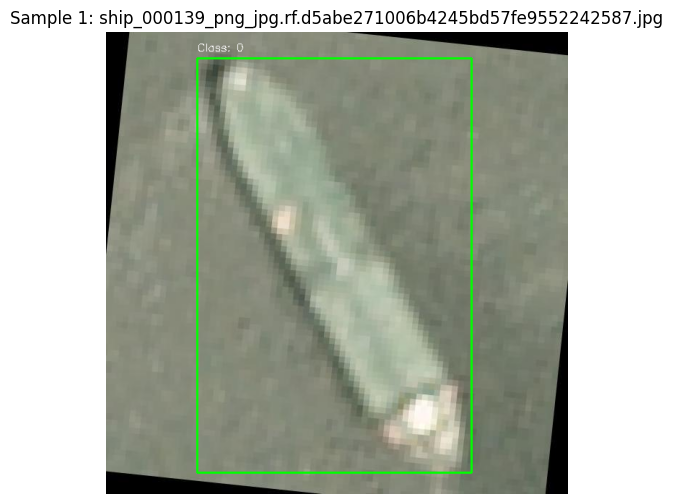

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


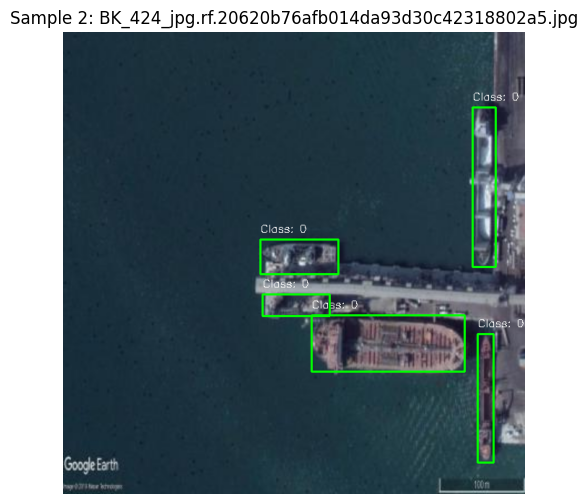

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


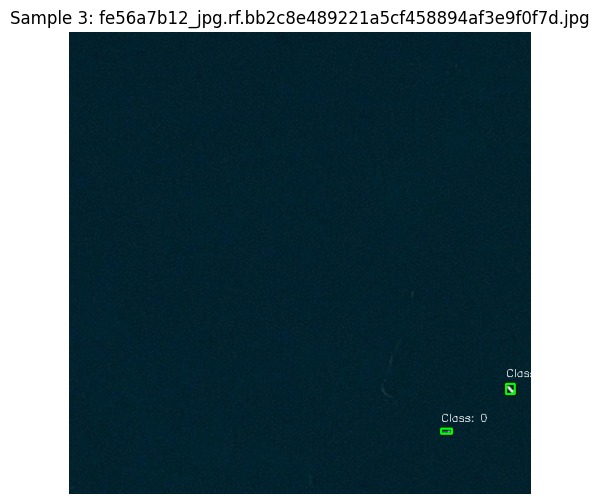

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


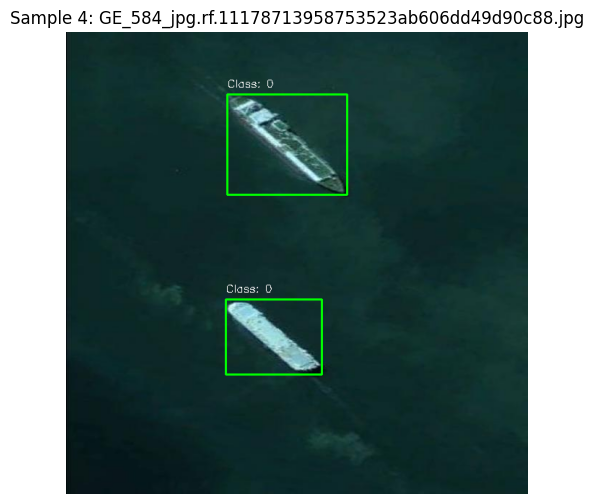

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


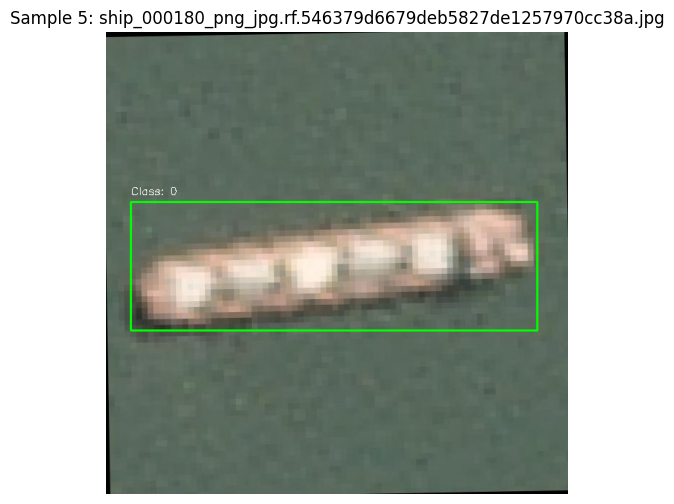

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


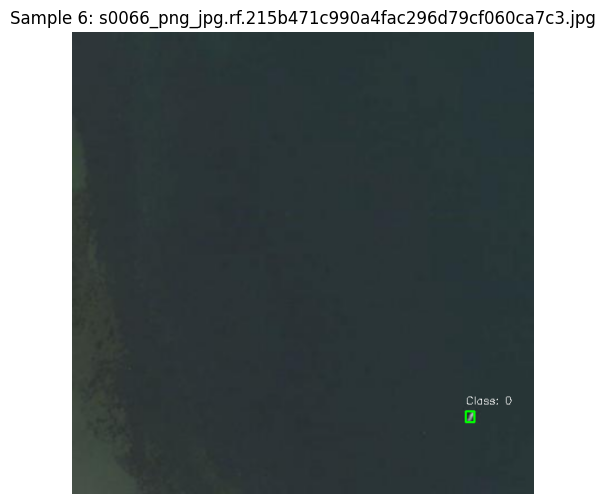

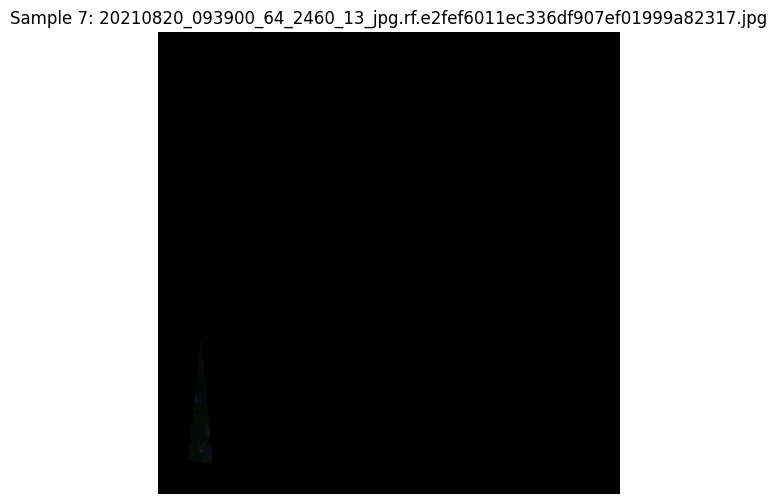

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


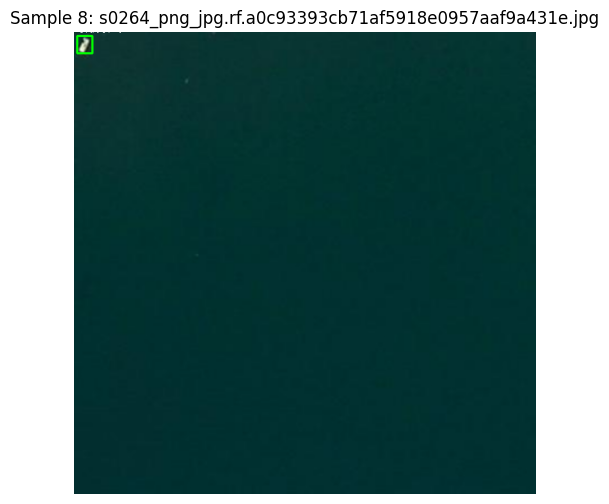

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


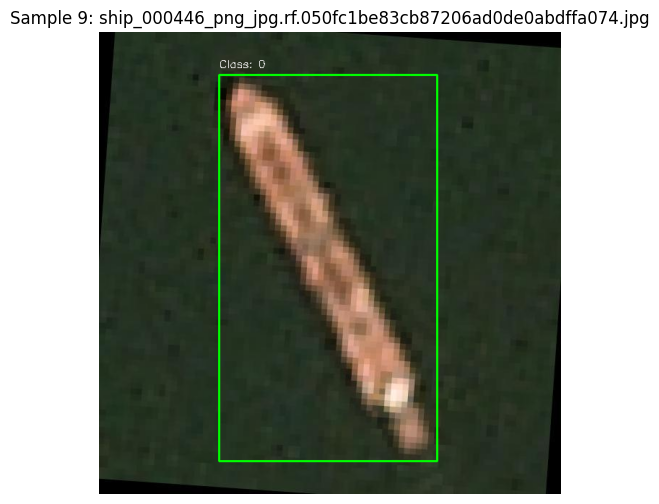

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


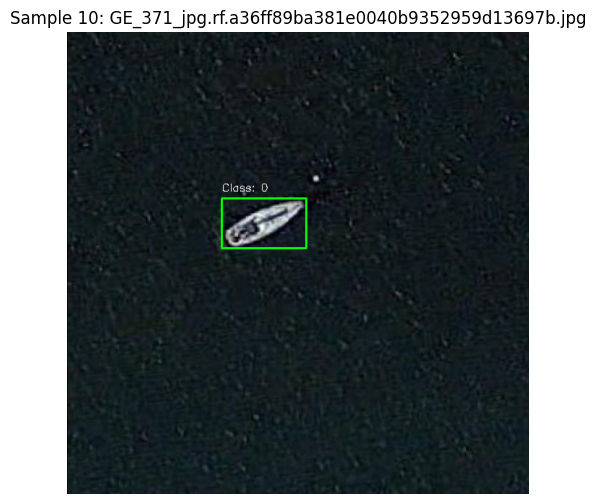

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


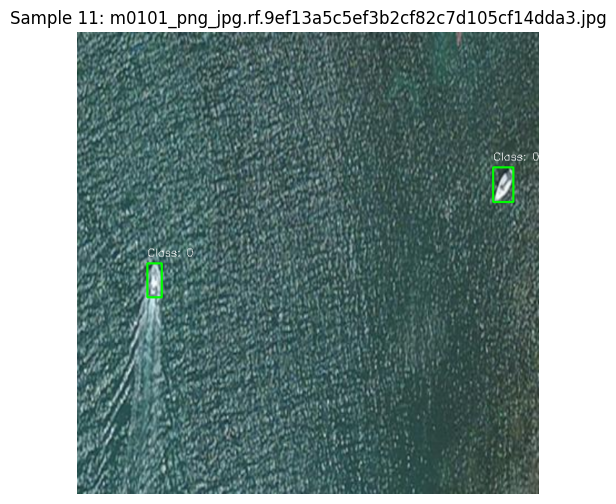

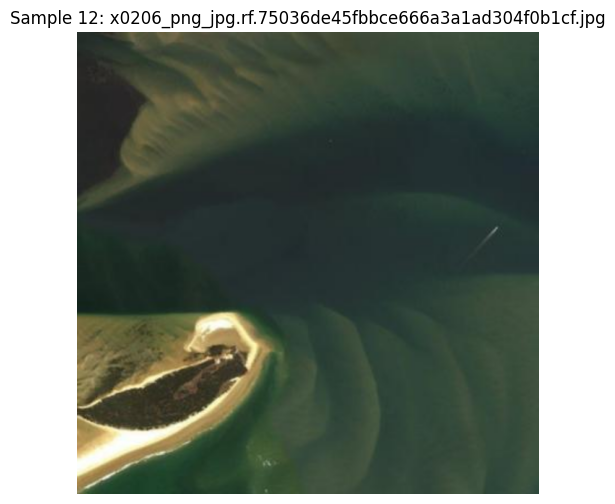

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


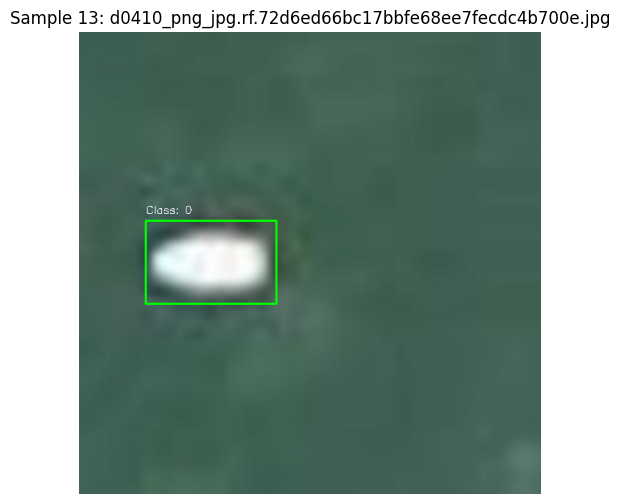

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


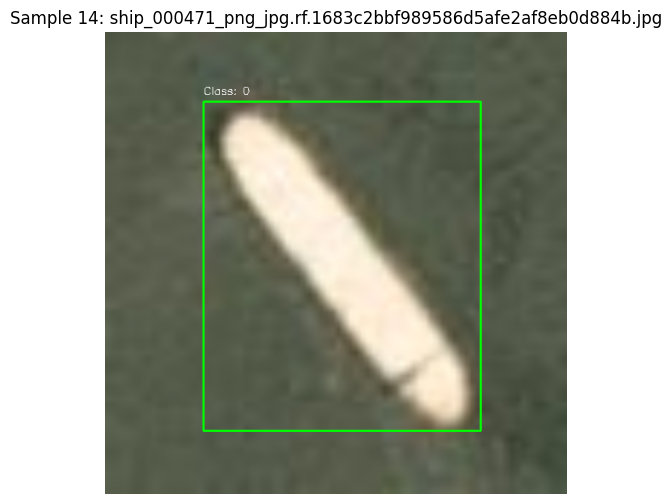

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


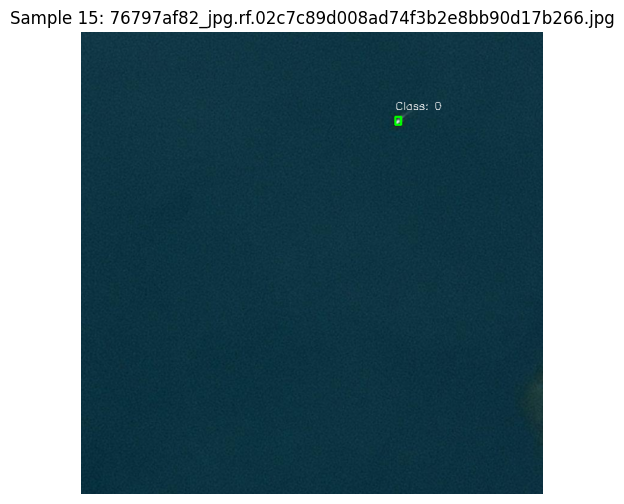

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


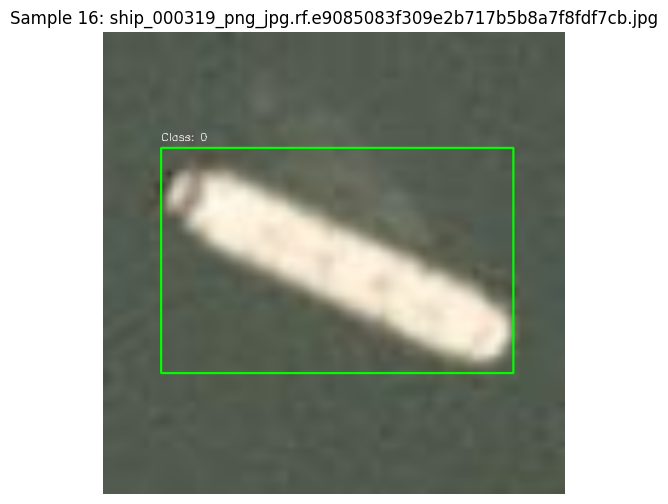

In [3]:
# Import required libraries
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from dataloader import YOLOv8DataGenerator, yolo_to_pascal_voc


def visualize_samples(generator, num_samples=5):
    """
    Visualizes a few samples from the YOLOv8 data generator, including filenames.

    Args:
        generator (YOLOv8DataGenerator): The data generator instance.
        num_samples (int): Number of samples to visualize.
    """
    # Load a batch
    images, labels = generator[0]

    # Ensure num_samples doesn't exceed batch size
    num_samples = min(num_samples, len(images))

    # Get filenames corresponding to this batch
    filenames = generator.image_files[:num_samples]

    for i in range(num_samples):
        img = images[i].copy()  # Copy to avoid overwriting the original data
        bboxes = labels[i]

        # Convert bounding boxes from normalized YOLO to Pascal VOC for the resized image
        pascal_bboxes = []
        for bbox in bboxes:
            cls, x_center, y_center, width, height = bbox

            # Convert normalized YOLO format to pixel values for resized image dimensions
            x_min = int((x_center - width / 2) )
            y_min = int((y_center - height / 2))
            x_max = int((x_center + width / 2) )
            y_max = int((y_center + height / 2))


            pascal_bboxes.append((cls, x_min, y_min, x_max, y_max))

        # Draw bounding boxes
        for bbox in pascal_bboxes:
            cls, x_min, y_min, x_max, y_max = bbox
            cv2.rectangle(
                img,
                (x_min, y_min),
                (x_max, y_max),
                (0, 255, 0),  # Green bounding box
                2
            )
            cv2.putText(
                img,
                f"Class: {int(cls)}",
                # Ensure text doesn't go out of bounds
                (x_min, max(y_min - 10, 0)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (255, 255, 255),  # White text
                1,
                cv2.LINE_AA
            )

        # Convert image to uint8 for imshow
        # img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)

        # Display the image with the filename as the title
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Sample {i + 1}: {os.path.basename(filenames[i])}")
        plt.show()


# Configuration
data_path = "/mnt/c/Users/Ricardo/Documents/Development/tcc-1/ships_v10i"
img_size = (640, 640)
batch_size = 16

# Create directories for train data
train_images_dir = os.path.join(data_path, "train/images")
train_labels_dir = os.path.join(data_path, "train/labels")

# Create the data generator
train_generator = YOLOv8DataGenerator(
    images_dir=train_images_dir,
    labels_dir=train_labels_dir,
    batch_size=batch_size,
    target_size=img_size,
    shuffle=True
)

# Visualize samples
visualize_samples(train_generator, num_samples=32)